In [1]:
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error 
from matplotlib import pyplot as plt
import seaborn as sb
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings 
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)
from xgboost import XGBRegressor

Using TensorFlow backend.
/anaconda3/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: compiletime version 3.6 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.5
  return f(*args, **kwds)


In [2]:
X_train = pd.read_csv("dengue_features_train.csv")

In [3]:
X_train.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8


In [4]:
y_train = pd.read_csv("dengue_labels_train.csv")

In [5]:
y_train

,city,year,weekofyear,total_cases
0,sj,1990,18,4
1,sj,1990,19,5
2,sj,1990,20,4
3,sj,1990,21,3
4,sj,1990,22,6
5,sj,1990,23,2
6,sj,1990,24,4
7,sj,1990,25,5
8,sj,1990,26,10
9,sj,1990,27,6


In [6]:
del y_train['city']

In [7]:
del y_train['year']

In [8]:
del y_train['weekofyear']

In [9]:
y_train

,total_cases
0,4
1,5
2,4
3,3
4,6
5,2
6,4
7,5
8,10
9,6


In [10]:
X_test = pd.read_csv("dengue_features_test.csv")

In [11]:
X_test

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,2008,18,2008-04-29,-0.018900,-0.018900,0.102729,0.091200,78.60,298.492857,...,25.37,78.781429,78.60,15.918571,3.128571,26.528571,7.057143,33.3,21.7,75.2
1,sj,2008,19,2008-05-06,-0.018000,-0.012400,0.082043,0.072314,12.56,298.475714,...,21.83,78.230000,12.56,15.791429,2.571429,26.071429,5.557143,30.0,22.2,34.3
2,sj,2008,20,2008-05-13,-0.001500,NaN,0.151083,0.091529,3.66,299.455714,...,4.12,78.270000,3.66,16.674286,4.428571,27.928571,7.785714,32.8,22.8,3.0
3,sj,2008,21,2008-05-20,NaN,-0.019867,0.124329,0.125686,0.00,299.690000,...,2.20,73.015714,0.00,15.775714,4.342857,28.057143,6.271429,33.3,24.4,0.3
4,sj,2008,22,2008-05-27,0.056800,0.039833,0.062267,0.075914,0.76,299.780000,...,4.36,74.084286,0.76,16.137143,3.542857,27.614286,7.085714,33.3,23.3,84.1
5,sj,2008,23,2008-06-03,-0.044000,-0.030467,0.132000,0.083529,71.17,299.768571,...,22.55,76.557143,71.17,16.667143,2.857143,28.000000,5.171429,32.8,25.0,27.7
6,sj,2008,24,2008-06-10,-0.044300,-0.024925,0.132271,0.159157,48.99,300.062857,...,13.10,76.844286,48.99,17.010000,3.157143,27.400000,6.042857,31.1,23.3,91.7
7,sj,2008,25,2008-06-17,NaN,0.082150,0.144371,0.116729,30.81,300.484286,...,7.20,76.870000,30.81,17.420000,3.900000,28.757143,6.985714,34.4,24.4,0.3
8,sj,2008,26,2008-06-24,0.010800,0.049900,0.100571,0.117329,8.02,300.601429,...,17.10,77.395714,8.02,17.678571,2.785714,28.657143,6.242857,32.8,23.9,28.7
9,sj,2008,27,2008-07-01,0.072667,0.106660,0.155429,0.164900,17.52,300.497143,...,11.90,78.534286,17.52,17.808571,2.228571,28.457143,4.628571,31.1,25.0,2.9


In [12]:
combined = X_train.append(X_test)

In [13]:
combined.shape

(1872, 24)

In [14]:
combined

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8
5,sj,1990,23,1990-06-04,NaN,0.174850,0.254314,0.181743,9.58,299.630000,...,26.49,79.891429,9.58,17.212857,2.100000,28.114286,6.942857,34.4,23.9,39.1
6,sj,1990,24,1990-06-11,0.112900,0.092800,0.205071,0.210271,3.48,299.207143,...,38.60,82.000000,3.48,17.234286,2.042857,27.414286,6.771429,32.2,23.3,29.7
7,sj,1990,25,1990-06-18,0.072500,0.072500,0.151471,0.133029,151.12,299.591429,...,30.00,83.375714,151.12,17.977143,1.571429,28.371429,7.685714,33.9,22.8,21.1
8,sj,1990,26,1990-06-25,0.102450,0.146175,0.125571,0.123600,19.32,299.578571,...,37.51,82.768571,19.32,17.790000,1.885714,28.328571,7.385714,33.9,22.8,21.1
9,sj,1990,27,1990-07-02,NaN,0.121550,0.160683,0.202567,14.41,300.154286,...,28.40,81.281429,14.41,18.071429,2.014286,28.328571,6.514286,33.9,24.4,1.1


In [15]:
combined.describe()

,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
count,1872.000000,1872.000000,1635.000000,1809.000000,1849.000000,1849.000000,1857.000000,1860.000000,1860.000000,1860.000000,...,1860.00000,1860.000000,1857.000000,1860.000000,1860.000000,1817.000000,1817.000000,1849.000000,1849.000000,1845.000000
mean,2003.194979,26.489316,0.138588,0.129713,0.204663,0.202174,44.109278,298.727770,299.253955,295.284823,...,40.60128,82.237158,44.109278,16.786638,4.952903,27.226651,8.004112,32.470795,22.160790,38.201897
std,6.292268,15.006319,0.146413,0.125082,0.075064,0.085768,42.065868,1.387410,1.272510,1.528046,...,44.70528,7.203803,42.065868,1.547336,3.545887,1.281254,2.205734,1.950483,1.613325,44.961360
min,1990.000000,1.000000,-0.463400,-0.456100,-0.015533,-0.063457,0.000000,294.554286,294.892857,289.642857,...,0.00000,57.787143,0.000000,11.715714,1.357143,21.400000,4.042857,26.700000,14.200000,0.000000
25%,1999.000000,13.750000,0.035300,0.041225,0.153457,0.141014,9.430000,297.678929,298.276786,294.164643,...,12.49250,77.214643,9.430000,15.590714,2.357143,26.328571,6.357143,31.100000,21.100000,8.800000
50%,2004.000000,26.000000,0.127317,0.115200,0.197029,0.188229,36.640000,298.617143,299.300000,295.667143,...,27.08000,80.307143,36.640000,17.137143,2.871429,27.433333,7.200000,32.800000,22.200000,23.800000
75%,2008.000000,39.000000,0.252225,0.223360,0.250857,0.248086,67.500000,299.891429,300.271429,296.502857,...,53.12500,86.799286,67.500000,18.028929,7.757143,28.200000,9.625000,33.900000,23.300000,51.500000
max,2013.000000,53.000000,0.508357,0.649000,0.538314,0.546017,390.600000,302.200000,303.328571,298.450000,...,570.50000,98.610000,390.600000,20.461429,16.028571,30.800000,15.800000,42.200000,26.700000,543.300000


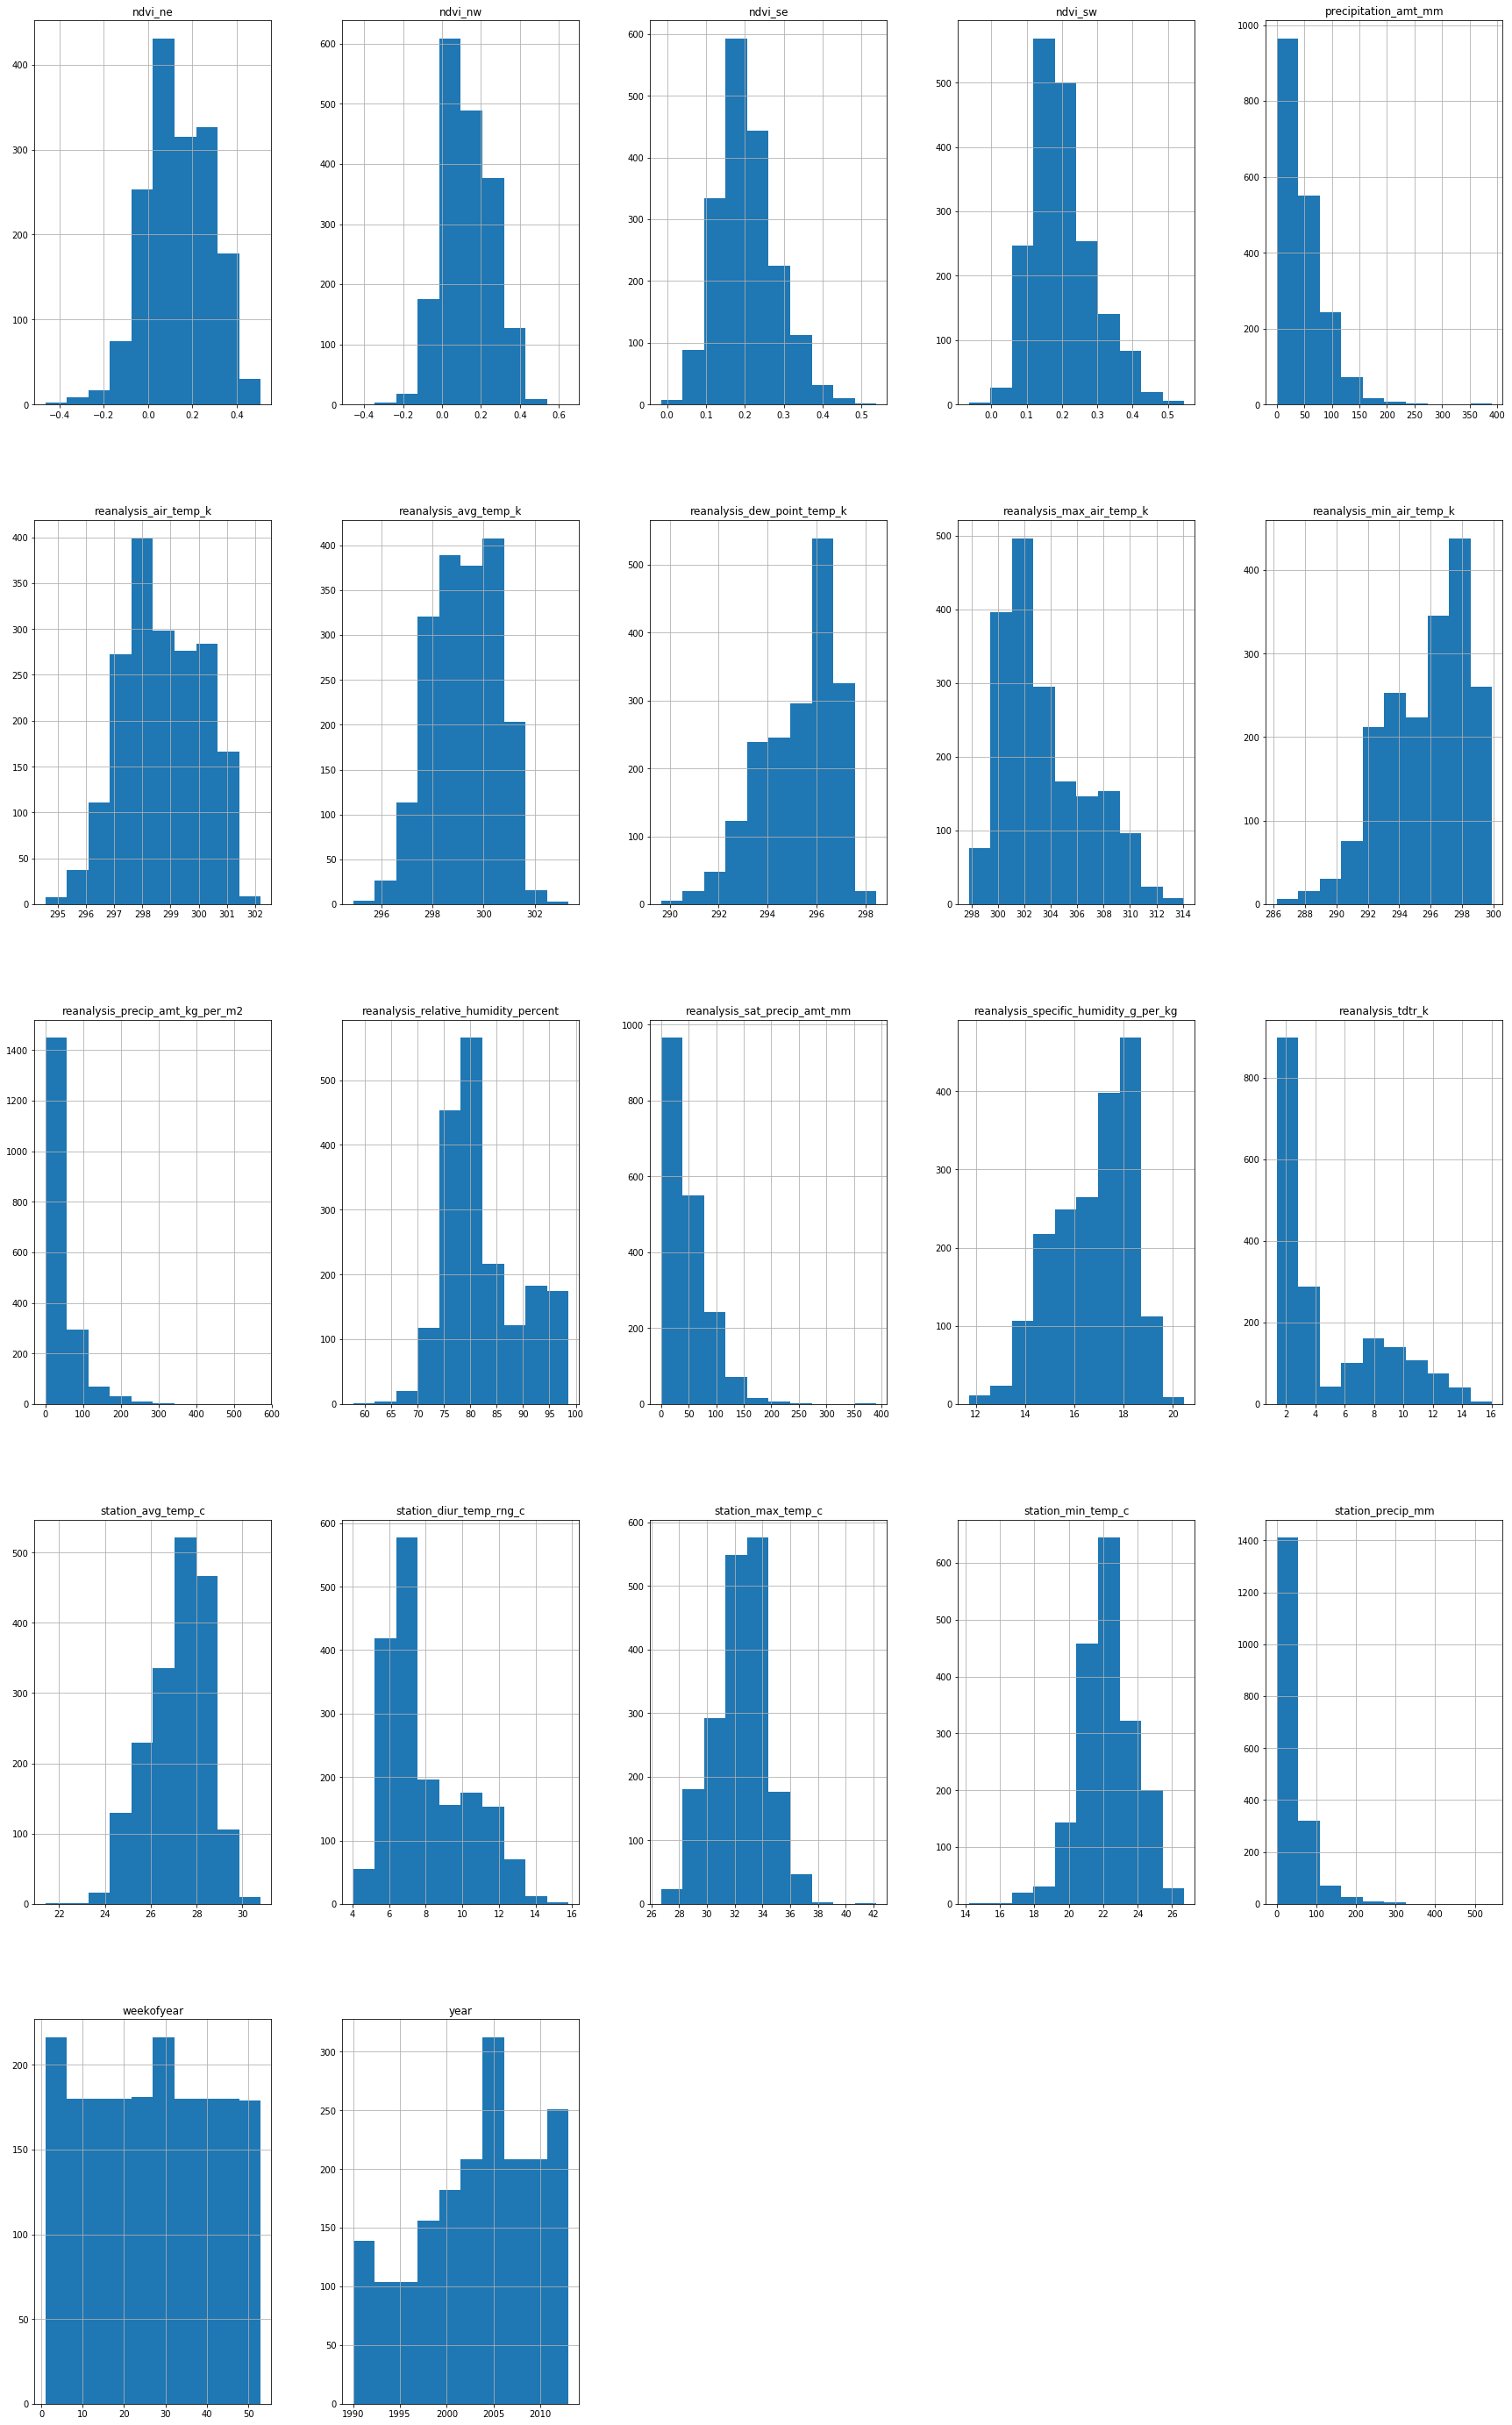

In [17]:
combined.hist()
plt.rcParams['figure.figsize'] = [5, 10]
plt.show()

In [18]:
combined.columns

Index(['city', 'year', 'weekofyear', 'week_start_date', 'ndvi_ne', 'ndvi_nw',
       'ndvi_se', 'ndvi_sw', 'precipitation_amt_mm', 'reanalysis_air_temp_k',
       'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
       'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k',
       'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k',
       'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
       'station_min_temp_c', 'station_precip_mm'],
      dtype='object')

In [21]:
plt.rcParams.keys()

KeysView(RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.avconv_args': [],
          'animation.avconv_path': 'avconv',
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': [],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.html_args': [],
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': 'line',
          'axes.edgecolor': 'black',
          'axes.facecolor': 'white',
          'axes.formatter.limits': [-7, 7],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
        

In [19]:
X_train['total cases'] = y_train

In [20]:
X_train

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total cases
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6
5,sj,1990,23,1990-06-04,NaN,0.174850,0.254314,0.181743,9.58,299.630000,...,79.891429,9.58,17.212857,2.100000,28.114286,6.942857,34.4,23.9,39.1,2
6,sj,1990,24,1990-06-11,0.112900,0.092800,0.205071,0.210271,3.48,299.207143,...,82.000000,3.48,17.234286,2.042857,27.414286,6.771429,32.2,23.3,29.7,4
7,sj,1990,25,1990-06-18,0.072500,0.072500,0.151471,0.133029,151.12,299.591429,...,83.375714,151.12,17.977143,1.571429,28.371429,7.685714,33.9,22.8,21.1,5
8,sj,1990,26,1990-06-25,0.102450,0.146175,0.125571,0.123600,19.32,299.578571,...,82.768571,19.32,17.790000,1.885714,28.328571,7.385714,33.9,22.8,21.1,10
9,sj,1990,27,1990-07-02,NaN,0.121550,0.160683,0.202567,14.41,300.154286,...,81.281429,14.41,18.071429,2.014286,28.328571,6.514286,33.9,24.4,1.1,6


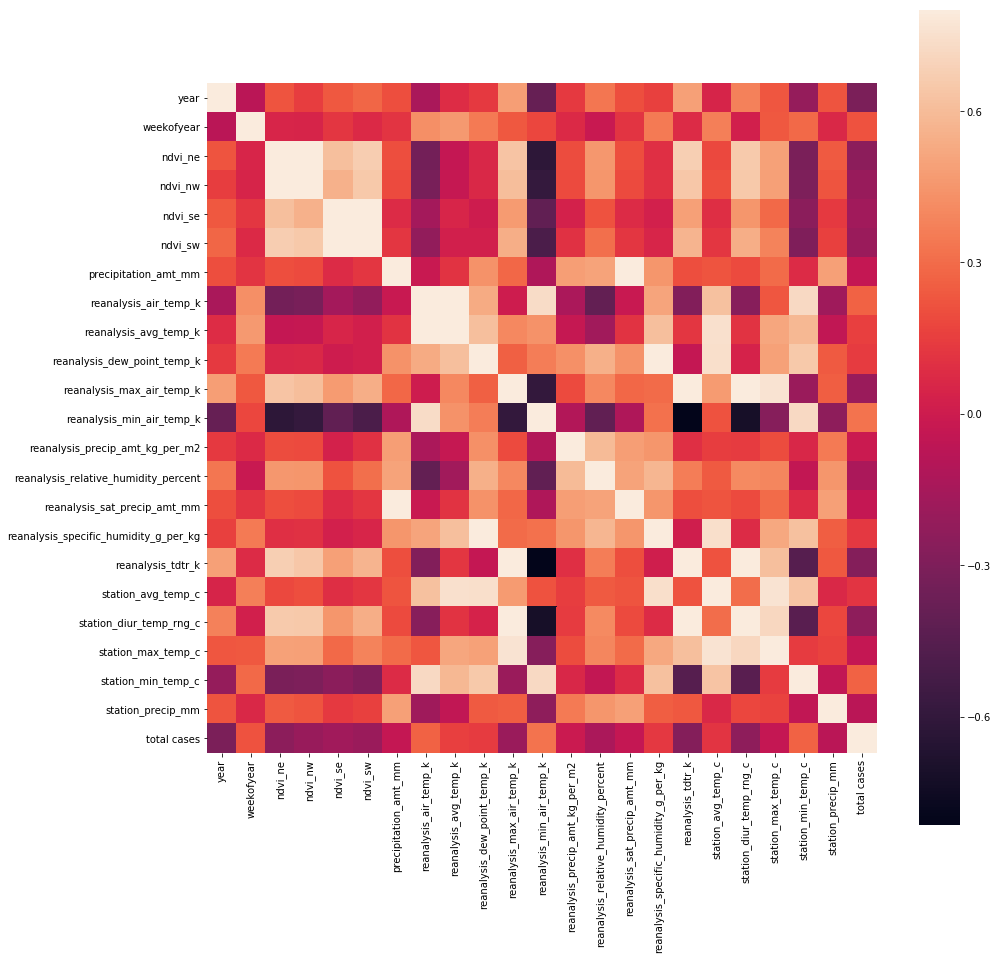

In [104]:
c_map = X_train.corr()
fig = plt.figure(figsize=(15,15))
sb.heatmap(c_map, vmax = 0.8, square=True)
plt.show()

In [23]:
combined.isnull().sum()

city                                       0
year                                       0
weekofyear                                 0
week_start_date                            0
ndvi_ne                                  237
ndvi_nw                                   63
ndvi_se                                   23
ndvi_sw                                   23
precipitation_amt_mm                      15
reanalysis_air_temp_k                     12
reanalysis_avg_temp_k                     12
reanalysis_dew_point_temp_k               12
reanalysis_max_air_temp_k                 12
reanalysis_min_air_temp_k                 12
reanalysis_precip_amt_kg_per_m2           12
reanalysis_relative_humidity_percent      12
reanalysis_sat_precip_amt_mm              15
reanalysis_specific_humidity_g_per_kg     12
reanalysis_tdtr_k                         12
station_avg_temp_c                        55
station_diur_temp_rng_c                   55
station_max_temp_c                        23
station_mi

In [24]:
combined.shape

(1872, 24)

In [25]:
combined.fillna(X_train.mean(), inplace=True)

In [26]:
combined.isnull().sum()

city                                     0
year                                     0
weekofyear                               0
week_start_date                          0
ndvi_ne                                  0
ndvi_nw                                  0
ndvi_se                                  0
ndvi_sw                                  0
precipitation_amt_mm                     0
reanalysis_air_temp_k                    0
reanalysis_avg_temp_k                    0
reanalysis_dew_point_temp_k              0
reanalysis_max_air_temp_k                0
reanalysis_min_air_temp_k                0
reanalysis_precip_amt_kg_per_m2          0
reanalysis_relative_humidity_percent     0
reanalysis_sat_precip_amt_mm             0
reanalysis_specific_humidity_g_per_kg    0
reanalysis_tdtr_k                        0
station_avg_temp_c                       0
station_diur_temp_rng_c                  0
station_max_temp_c                       0
station_min_temp_c                       0
station_pre

In [27]:
from sklearn.preprocessing import LabelEncoder

In [28]:
encoder = LabelEncoder()

In [30]:
combined['city'] = encoder.fit_transform(combined['city'])

In [31]:
combined

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,1,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,1,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
2,1,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
3,1,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
4,1,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8
5,1,1990,23,1990-06-04,0.142294,0.174850,0.254314,0.181743,9.58,299.630000,...,26.49,79.891429,9.58,17.212857,2.100000,28.114286,6.942857,34.4,23.9,39.1
6,1,1990,24,1990-06-11,0.112900,0.092800,0.205071,0.210271,3.48,299.207143,...,38.60,82.000000,3.48,17.234286,2.042857,27.414286,6.771429,32.2,23.3,29.7
7,1,1990,25,1990-06-18,0.072500,0.072500,0.151471,0.133029,151.12,299.591429,...,30.00,83.375714,151.12,17.977143,1.571429,28.371429,7.685714,33.9,22.8,21.1
8,1,1990,26,1990-06-25,0.102450,0.146175,0.125571,0.123600,19.32,299.578571,...,37.51,82.768571,19.32,17.790000,1.885714,28.328571,7.385714,33.9,22.8,21.1
9,1,1990,27,1990-07-02,0.142294,0.121550,0.160683,0.202567,14.41,300.154286,...,28.40,81.281429,14.41,18.071429,2.014286,28.328571,6.514286,33.9,24.4,1.1


In [35]:
X_train.shape

(1456, 25)

In [36]:
combined.shape

(1872, 24)

In [37]:
train = combined[:1456]

In [38]:
train.shape

(1456, 24)

In [39]:
test = combined[1456:]

In [41]:
test.shape

(416, 24)

In [42]:
X_test.shape

(416, 24)

In [45]:
X_val = train[-50:]

In [46]:
X_val

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
1406,0,2009,29,2009-07-16,0.219650,0.378050,0.223871,0.265900,65.190000,296.527143,...,40.100000,94.624286,65.190000,16.920000,7.271429,26.825000,10.425000,34.500000,21.30000,38.90000
1407,0,2009,30,2009-07-23,0.207883,0.280850,0.175600,0.261600,35.820000,296.525714,...,12.930000,88.230000,35.820000,15.510000,9.528571,26.950000,10.250000,32.200000,21.00000,20.40000
1408,0,2009,31,2009-07-30,0.154357,0.115271,0.153457,0.155900,51.770000,297.087143,...,39.300000,89.971429,51.770000,16.602857,9.757143,27.000000,11.500000,33.500000,20.50000,32.00000
1409,0,2009,32,2009-08-06,0.395000,0.352733,0.484286,0.401914,9.790000,297.370000,...,34.400000,87.811429,9.790000,16.337143,11.757143,27.975000,12.100000,35.400000,20.50000,39.32636
1410,0,2009,33,2009-08-13,0.330886,0.408300,0.443357,0.334771,35.230000,298.357143,...,43.200000,87.110000,35.230000,17.040000,11.342857,27.700000,11.500000,33.400000,21.00000,20.10000
1411,0,2009,34,2009-08-20,0.220629,0.194357,0.278571,0.260457,6.520000,298.677143,...,25.300000,80.640000,6.520000,16.228571,10.928571,28.320000,12.860000,36.200000,21.20000,1.00000
1412,0,2009,35,2009-08-27,0.245343,0.185986,0.181343,0.282057,95.830000,298.997143,...,45.340000,88.177143,95.830000,18.122857,11.785714,29.000000,13.000000,36.200000,22.00000,27.20000
1413,0,2009,36,2009-09-03,0.508357,0.454429,0.538314,0.514829,83.020000,297.388571,...,78.370000,94.992857,83.020000,17.988571,7.642857,27.600000,13.200000,34.200000,21.00000,47.50000
1414,0,2009,37,2009-09-10,0.189617,0.192000,0.236814,0.269686,13.740000,299.855714,...,9.300000,75.232857,13.740000,15.865714,13.042857,29.166667,14.133333,37.400000,21.40000,6.10000
1415,0,2009,38,2009-09-17,0.266320,0.313367,0.195657,0.307071,40.170000,299.470000,...,23.010000,78.118571,40.170000,16.202857,11.600000,28.850000,12.750000,37.200000,20.40000,0.80000


In [49]:
y_val = y_train[-50:]

In [50]:
y_val

,total_cases
1406,0
1407,0
1408,3
1409,5
1410,5
1411,7
1412,5
1413,2
1414,2
1415,2


In [52]:
train = train[:1406]

In [53]:
train

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,1,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.420000,297.572857,...,32.000000,73.365714,12.420000,14.012857,2.628571,25.442857,6.900000,29.400000,20.00000,16.00000
1,1,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.820000,298.211429,...,17.940000,77.368571,22.820000,15.372857,2.371429,26.714286,6.371429,31.700000,22.20000,8.60000
2,1,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.540000,298.781429,...,26.100000,82.052857,34.540000,16.848571,2.300000,26.714286,6.485714,32.200000,22.80000,41.40000
3,1,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.360000,298.987143,...,13.900000,80.337143,15.360000,16.672857,2.428571,27.471429,6.771429,33.300000,23.30000,4.00000
4,1,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.520000,299.518571,...,12.200000,80.460000,7.520000,17.210000,3.014286,28.942857,9.371429,35.000000,23.90000,5.80000
5,1,1990,23,1990-06-04,0.142294,0.174850,0.254314,0.181743,9.580000,299.630000,...,26.490000,79.891429,9.580000,17.212857,2.100000,28.114286,6.942857,34.400000,23.90000,39.10000
6,1,1990,24,1990-06-11,0.112900,0.092800,0.205071,0.210271,3.480000,299.207143,...,38.600000,82.000000,3.480000,17.234286,2.042857,27.414286,6.771429,32.200000,23.30000,29.70000
7,1,1990,25,1990-06-18,0.072500,0.072500,0.151471,0.133029,151.120000,299.591429,...,30.000000,83.375714,151.120000,17.977143,1.571429,28.371429,7.685714,33.900000,22.80000,21.10000
8,1,1990,26,1990-06-25,0.102450,0.146175,0.125571,0.123600,19.320000,299.578571,...,37.510000,82.768571,19.320000,17.790000,1.885714,28.328571,7.385714,33.900000,22.80000,21.10000
9,1,1990,27,1990-07-02,0.142294,0.121550,0.160683,0.202567,14.410000,300.154286,...,28.400000,81.281429,14.410000,18.071429,2.014286,28.328571,6.514286,33.900000,24.40000,1.10000


In [54]:
y_train = y_train[:1406]

In [55]:
y_train

,total_cases
0,4
1,5
2,4
3,3
4,6
5,2
6,4
7,5
8,10
9,6


In [88]:
model = Sequential()

# The Input Layer :
model.add(Dense(128, kernel_initializer='normal',input_dim = train.shape[1], activation='relu'))

# The Hidden Layers :
model.add(Dense(256, kernel_initializer='normal',activation='relu'))
model.add(Dense(256, kernel_initializer='normal',activation='relu'))
model.add(Dense(256, kernel_initializer='normal',activation='relu'))

# The Output Layer :
model.add(Dense(1, kernel_initializer='normal',activation='linear'))

# Compile the network :
model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 128)               3072      
_________________________________________________________________
dense_12 (Dense)             (None, 256)               33024     
_________________________________________________________________
dense_13 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_14 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 257       
Total params: 167,937
Trainable params: 167,937
Non-trainable params: 0
_________________________________________________________________


In [89]:
model.fit(train, y_train, epochs=500, batch_size=32)

Epoch 1/500
1406/1406 [==============================] - 1s 424us/step - loss: 21.0109 - mean_absolute_error: 21.0109
Epoch 2/500
1406/1406 [==============================] - 0s 111us/step - loss: 20.3661 - mean_absolute_error: 20.3661
Epoch 3/500
1406/1406 [==============================] - 0s 114us/step - loss: 20.2461 - mean_absolute_error: 20.2461
Epoch 4/500
1406/1406 [==============================] - 0s 114us/step - loss: 20.3317 - mean_absolute_error: 20.3317
Epoch 5/500
1406/1406 [==============================] - 0s 113us/step - loss: 20.3091 - mean_absolute_error: 20.3091
Epoch 6/500
1406/1406 [==============================] - 0s 110us/step - loss: 20.0241 - mean_absolute_error: 20.0241
Epoch 7/500
1406/1406 [==============================] - 0s 111us/step - loss: 19.8371 - mean_absolute_error: 19.8371
Epoch 8/500
1406/1406 [==============================] - 0s 112us/step - loss: 20.0577 - mean_absolute_error: 20.0577
Epoch 9/500
1406/1406 [==============================] -

1406/1406 [==============================] - 0s 121us/step - loss: 17.1590 - mean_absolute_error: 17.1590
Epoch 70/500
1406/1406 [==============================] - 0s 115us/step - loss: 16.8854 - mean_absolute_error: 16.8854
Epoch 71/500
1406/1406 [==============================] - 0s 111us/step - loss: 16.9948 - mean_absolute_error: 16.9948
Epoch 72/500
1406/1406 [==============================] - 0s 113us/step - loss: 16.8931 - mean_absolute_error: 16.8931
Epoch 73/500
1406/1406 [==============================] - 0s 111us/step - loss: 17.1031 - mean_absolute_error: 17.1031
Epoch 74/500
1406/1406 [==============================] - 0s 114us/step - loss: 17.1063 - mean_absolute_error: 17.1063
Epoch 75/500
1406/1406 [==============================] - 0s 114us/step - loss: 17.0848 - mean_absolute_error: 17.0848
Epoch 76/500
1406/1406 [==============================] - 0s 112us/step - loss: 16.9225 - mean_absolute_error: 16.9225
Epoch 77/500
1406/1406 [==============================] - 0s 

1406/1406 [==============================] - 0s 116us/step - loss: 17.0174 - mean_absolute_error: 17.0174
Epoch 138/500
1406/1406 [==============================] - 0s 116us/step - loss: 16.4566 - mean_absolute_error: 16.4566
Epoch 139/500
1406/1406 [==============================] - 0s 114us/step - loss: 16.4261 - mean_absolute_error: 16.4261
Epoch 140/500
1406/1406 [==============================] - 0s 111us/step - loss: 16.7057 - mean_absolute_error: 16.7057
Epoch 141/500
1406/1406 [==============================] - 0s 109us/step - loss: 16.3783 - mean_absolute_error: 16.3783
Epoch 142/500
1406/1406 [==============================] - 0s 112us/step - loss: 16.2968 - mean_absolute_error: 16.2968
Epoch 143/500
1406/1406 [==============================] - 0s 111us/step - loss: 16.6665 - mean_absolute_error: 16.6665
Epoch 144/500
1406/1406 [==============================] - 0s 112us/step - loss: 16.5035 - mean_absolute_error: 16.5035
Epoch 145/500
1406/1406 [=============================

1406/1406 [==============================] - 0s 112us/step - loss: 16.2371 - mean_absolute_error: 16.2371
Epoch 206/500
1406/1406 [==============================] - 0s 110us/step - loss: 16.2627 - mean_absolute_error: 16.2627
Epoch 207/500
1406/1406 [==============================] - 0s 112us/step - loss: 16.2389 - mean_absolute_error: 16.2389
Epoch 208/500
1406/1406 [==============================] - 0s 113us/step - loss: 16.2730 - mean_absolute_error: 16.2730
Epoch 209/500
1406/1406 [==============================] - 0s 115us/step - loss: 16.2298 - mean_absolute_error: 16.2298
Epoch 210/500
1406/1406 [==============================] - 0s 111us/step - loss: 16.0241 - mean_absolute_error: 16.0241
Epoch 211/500
1406/1406 [==============================] - 0s 112us/step - loss: 15.9982 - mean_absolute_error: 15.9982
Epoch 212/500
1406/1406 [==============================] - 0s 111us/step - loss: 16.0989 - mean_absolute_error: 16.0989
Epoch 213/500
1406/1406 [=============================

1406/1406 [==============================] - 0s 118us/step - loss: 15.6458 - mean_absolute_error: 15.6458
Epoch 274/500
1406/1406 [==============================] - 0s 116us/step - loss: 15.7194 - mean_absolute_error: 15.7194
Epoch 275/500
1406/1406 [==============================] - 0s 118us/step - loss: 15.6584 - mean_absolute_error: 15.6584
Epoch 276/500
1406/1406 [==============================] - 0s 113us/step - loss: 16.1754 - mean_absolute_error: 16.1754
Epoch 277/500
1406/1406 [==============================] - 0s 110us/step - loss: 15.9683 - mean_absolute_error: 15.9683
Epoch 278/500
1406/1406 [==============================] - 0s 110us/step - loss: 15.7564 - mean_absolute_error: 15.7564
Epoch 279/500
1406/1406 [==============================] - 0s 111us/step - loss: 15.8639 - mean_absolute_error: 15.8639
Epoch 280/500
1406/1406 [==============================] - 0s 112us/step - loss: 15.7626 - mean_absolute_error: 15.7626
Epoch 281/500
1406/1406 [=============================

1406/1406 [==============================] - 0s 121us/step - loss: 15.3966 - mean_absolute_error: 15.3966
Epoch 342/500
1406/1406 [==============================] - 0s 115us/step - loss: 15.7184 - mean_absolute_error: 15.7184
Epoch 343/500
1406/1406 [==============================] - 0s 113us/step - loss: 15.4845 - mean_absolute_error: 15.4845
Epoch 344/500
1406/1406 [==============================] - 0s 112us/step - loss: 15.7441 - mean_absolute_error: 15.7441
Epoch 345/500
1406/1406 [==============================] - 0s 112us/step - loss: 15.4147 - mean_absolute_error: 15.4147
Epoch 346/500
1406/1406 [==============================] - 0s 112us/step - loss: 15.4823 - mean_absolute_error: 15.4823
Epoch 347/500
1406/1406 [==============================] - 0s 112us/step - loss: 15.3271 - mean_absolute_error: 15.3271
Epoch 348/500
1406/1406 [==============================] - 0s 112us/step - loss: 15.1763 - mean_absolute_error: 15.1763
Epoch 349/500
1406/1406 [=============================

1406/1406 [==============================] - 0s 128us/step - loss: 14.8500 - mean_absolute_error: 14.8500
Epoch 410/500
1406/1406 [==============================] - 0s 144us/step - loss: 14.7318 - mean_absolute_error: 14.7318
Epoch 411/500
1406/1406 [==============================] - 0s 171us/step - loss: 15.0035 - mean_absolute_error: 15.0035
Epoch 412/500
1406/1406 [==============================] - 0s 142us/step - loss: 15.0257 - mean_absolute_error: 15.0257
Epoch 413/500
1406/1406 [==============================] - 0s 177us/step - loss: 15.0374 - mean_absolute_error: 15.0374
Epoch 414/500
1406/1406 [==============================] - 0s 138us/step - loss: 15.0475 - mean_absolute_error: 15.0475
Epoch 415/500
1406/1406 [==============================] - 0s 119us/step - loss: 15.1251 - mean_absolute_error: 15.1251
Epoch 416/500
1406/1406 [==============================] - 0s 168us/step - loss: 15.0350 - mean_absolute_error: 15.0350
Epoch 417/500
1406/1406 [=============================

1406/1406 [==============================] - 0s 181us/step - loss: 14.4632 - mean_absolute_error: 14.4632
Epoch 478/500
1406/1406 [==============================] - 0s 188us/step - loss: 14.7689 - mean_absolute_error: 14.7689
Epoch 479/500
1406/1406 [==============================] - 0s 169us/step - loss: 14.3314 - mean_absolute_error: 14.3314
Epoch 480/500
1406/1406 [==============================] - 0s 170us/step - loss: 14.3748 - mean_absolute_error: 14.3748
Epoch 481/500
1406/1406 [==============================] - 0s 187us/step - loss: 14.3100 - mean_absolute_error: 14.3100
Epoch 482/500
1406/1406 [==============================] - 0s 206us/step - loss: 14.3308 - mean_absolute_error: 14.3308
Epoch 483/500
1406/1406 [==============================] - 0s 190us/step - loss: 14.2811 - mean_absolute_error: 14.2811
Epoch 484/500
1406/1406 [==============================] - 0s 185us/step - loss: 14.2194 - mean_absolute_error: 14.2194
Epoch 485/500
1406/1406 [=============================

In [60]:
del train['week_start_date']

In [61]:
y_train

,total_cases
0,4
1,5
2,4
3,3
4,6
5,2
6,4
7,5
8,10
9,6


In [73]:
X_val

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
1406,0,2009,29,2009-07-16,0.219650,0.378050,0.223871,0.265900,65.190000,296.527143,...,40.100000,94.624286,65.190000,16.920000,7.271429,26.825000,10.425000,34.500000,21.30000,38.90000
1407,0,2009,30,2009-07-23,0.207883,0.280850,0.175600,0.261600,35.820000,296.525714,...,12.930000,88.230000,35.820000,15.510000,9.528571,26.950000,10.250000,32.200000,21.00000,20.40000
1408,0,2009,31,2009-07-30,0.154357,0.115271,0.153457,0.155900,51.770000,297.087143,...,39.300000,89.971429,51.770000,16.602857,9.757143,27.000000,11.500000,33.500000,20.50000,32.00000
1409,0,2009,32,2009-08-06,0.395000,0.352733,0.484286,0.401914,9.790000,297.370000,...,34.400000,87.811429,9.790000,16.337143,11.757143,27.975000,12.100000,35.400000,20.50000,39.32636
1410,0,2009,33,2009-08-13,0.330886,0.408300,0.443357,0.334771,35.230000,298.357143,...,43.200000,87.110000,35.230000,17.040000,11.342857,27.700000,11.500000,33.400000,21.00000,20.10000
1411,0,2009,34,2009-08-20,0.220629,0.194357,0.278571,0.260457,6.520000,298.677143,...,25.300000,80.640000,6.520000,16.228571,10.928571,28.320000,12.860000,36.200000,21.20000,1.00000
1412,0,2009,35,2009-08-27,0.245343,0.185986,0.181343,0.282057,95.830000,298.997143,...,45.340000,88.177143,95.830000,18.122857,11.785714,29.000000,13.000000,36.200000,22.00000,27.20000
1413,0,2009,36,2009-09-03,0.508357,0.454429,0.538314,0.514829,83.020000,297.388571,...,78.370000,94.992857,83.020000,17.988571,7.642857,27.600000,13.200000,34.200000,21.00000,47.50000
1414,0,2009,37,2009-09-10,0.189617,0.192000,0.236814,0.269686,13.740000,299.855714,...,9.300000,75.232857,13.740000,15.865714,13.042857,29.166667,14.133333,37.400000,21.40000,6.10000
1415,0,2009,38,2009-09-17,0.266320,0.313367,0.195657,0.307071,40.170000,299.470000,...,23.010000,78.118571,40.170000,16.202857,11.600000,28.850000,12.750000,37.200000,20.40000,0.80000


In [74]:
X_val[0:1]

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
1406,0,2009,29,2009-07-16,0.21965,0.37805,0.223871,0.2659,65.19,296.527143,...,40.1,94.624286,65.19,16.92,7.271429,26.825,10.425,34.5,21.3,38.9


In [75]:
del X_val['week_start_date']

In [77]:
model.predict(X_val[0:1])

array([[0.11111698]], dtype=float32)

In [79]:
y_val[0:1]

,total_cases
1406,0


In [80]:
model.predict(X_val[1:2])

array([[1.0130104]], dtype=float32)

In [81]:
y_val[1:2]

,total_cases
1407,0


In [82]:
model.predict(X_val[2:3])

array([[0.12192905]], dtype=float32)

In [83]:
y_val[2:3]

,total_cases
1408,3


In [85]:
model.predict(X_val[0:30])

array([[ 0.11111699],
       [ 1.0130111 ],
       [ 0.12192899],
       [ 0.37952298],
       [ 0.44805986],
       [ 1.6694754 ],
       [ 0.12280874],
       [ 0.05858326],
       [ 1.4318185 ],
       [ 1.2013562 ],
       [ 0.380116  ],
       [ 0.11005853],
       [ 1.2316136 ],
       [ 0.6522505 ],
       [ 0.33918345],
       [ 0.12398651],
       [ 0.4682535 ],
       [ 0.4219376 ],
       [ 0.70239544],
       [ 1.8545015 ],
       [ 1.8704178 ],
       [ 1.2645788 ],
       [ 3.1163247 ],
       [ 3.5335457 ],
       [26.215822  ],
       [ 6.5079503 ],
       [ 2.6642401 ],
       [ 5.8040247 ],
       [ 0.3097647 ],
       [ 4.239655  ]], dtype=float32)

In [86]:
y_val[0:30]

,total_cases
1406,0
1407,0
1408,3
1409,5
1410,5
1411,7
1412,5
1413,2
1414,2
1415,2


In [87]:
model.save("attempt1.model.h5")

In [91]:
del test['week_start_date']

In [92]:
test.shape

(416, 23)

In [93]:
prediction = model.predict(test)

In [94]:
prediction

array([[ 5.77676201e+00],
       [ 1.98988795e+00],
       [ 6.91295195e+00],
       [ 8.81915569e+00],
       [ 4.06594086e+00],
       [ 1.29852009e+01],
       [ 9.64705849e+00],
       [ 1.07368469e+01],
       [ 4.46620941e+00],
       [ 1.40693254e+01],
       [ 8.63060093e+00],
       [ 1.62122402e+01],
       [ 1.34249582e+01],
       [ 2.10044403e+01],
       [ 2.15138435e+01],
       [ 2.28914337e+01],
       [ 2.31688957e+01],
       [ 2.20566025e+01],
       [ 2.70542183e+01],
       [ 3.27242203e+01],
       [ 3.14688835e+01],
       [ 1.06074209e+01],
       [ 3.10362167e+01],
       [ 3.42664223e+01],
       [ 4.18794365e+01],
       [ 5.32519798e+01],
       [ 3.73975868e+01],
       [ 3.06893616e+01],
       [ 4.19897194e+01],
       [ 3.83185921e+01],
       [ 3.38518028e+01],
       [ 2.84037247e+01],
       [ 1.98342400e+01],
       [ 2.23617668e+01],
       [ 1.97749290e+01],
       [ 1.74127998e+01],
       [ 1.83746796e+01],
       [ 1.81792221e+01],
       [ 2.2

In [95]:
a = test.iloc[:,0:3].values

In [96]:
a

array([[   1, 2008,   18],
       [   1, 2008,   19],
       [   1, 2008,   20],
       ...,
       [   0, 2013,   24],
       [   0, 2013,   25],
       [   0, 2013,   26]])

In [99]:
b = np.hstack((a, prediction))

In [100]:
b

array([[1.00000000e+00, 2.00800000e+03, 1.80000000e+01, 5.77676201e+00],
       [1.00000000e+00, 2.00800000e+03, 1.90000000e+01, 1.98988795e+00],
       [1.00000000e+00, 2.00800000e+03, 2.00000000e+01, 6.91295195e+00],
       ...,
       [0.00000000e+00, 2.01300000e+03, 2.40000000e+01, 1.74495268e+00],
       [0.00000000e+00, 2.01300000e+03, 2.50000000e+01, 3.40172482e+00],
       [0.00000000e+00, 2.01300000e+03, 2.60000000e+01, 2.04430652e+00]])

In [103]:
np.savetxt("model_1_13.97.csv", b, delimiter=",")

In [105]:
X_train.shape

(1456, 25)

In [106]:
X_train

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total cases
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6
5,sj,1990,23,1990-06-04,NaN,0.174850,0.254314,0.181743,9.58,299.630000,...,79.891429,9.58,17.212857,2.100000,28.114286,6.942857,34.4,23.9,39.1,2
6,sj,1990,24,1990-06-11,0.112900,0.092800,0.205071,0.210271,3.48,299.207143,...,82.000000,3.48,17.234286,2.042857,27.414286,6.771429,32.2,23.3,29.7,4
7,sj,1990,25,1990-06-18,0.072500,0.072500,0.151471,0.133029,151.12,299.591429,...,83.375714,151.12,17.977143,1.571429,28.371429,7.685714,33.9,22.8,21.1,5
8,sj,1990,26,1990-06-25,0.102450,0.146175,0.125571,0.123600,19.32,299.578571,...,82.768571,19.32,17.790000,1.885714,28.328571,7.385714,33.9,22.8,21.1,10
9,sj,1990,27,1990-07-02,NaN,0.121550,0.160683,0.202567,14.41,300.154286,...,81.281429,14.41,18.071429,2.014286,28.328571,6.514286,33.9,24.4,1.1,6


In [107]:
combined.shape

(1872, 24)

In [108]:
combined

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,1,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,1,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
2,1,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
3,1,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
4,1,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8
5,1,1990,23,1990-06-04,0.142294,0.174850,0.254314,0.181743,9.58,299.630000,...,26.49,79.891429,9.58,17.212857,2.100000,28.114286,6.942857,34.4,23.9,39.1
6,1,1990,24,1990-06-11,0.112900,0.092800,0.205071,0.210271,3.48,299.207143,...,38.60,82.000000,3.48,17.234286,2.042857,27.414286,6.771429,32.2,23.3,29.7
7,1,1990,25,1990-06-18,0.072500,0.072500,0.151471,0.133029,151.12,299.591429,...,30.00,83.375714,151.12,17.977143,1.571429,28.371429,7.685714,33.9,22.8,21.1
8,1,1990,26,1990-06-25,0.102450,0.146175,0.125571,0.123600,19.32,299.578571,...,37.51,82.768571,19.32,17.790000,1.885714,28.328571,7.385714,33.9,22.8,21.1
9,1,1990,27,1990-07-02,0.142294,0.121550,0.160683,0.202567,14.41,300.154286,...,28.40,81.281429,14.41,18.071429,2.014286,28.328571,6.514286,33.9,24.4,1.1


In [110]:
del combined['week_start_date']

In [111]:
np.savetxt("combined.csv", combined, delimiter=",")

In [112]:
combined.columns

Index(['city', 'year', 'weekofyear', 'ndvi_ne', 'ndvi_nw', 'ndvi_se',
       'ndvi_sw', 'precipitation_amt_mm', 'reanalysis_air_temp_k',
       'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
       'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k',
       'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k',
       'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
       'station_min_temp_c', 'station_precip_mm'],
      dtype='object')

In [113]:
del combined['city']

In [114]:
del combined['year']

In [115]:
del combined['weekofyear']

In [116]:
del combined['precipitation_amt_mm']

In [117]:
del combined['reanalysis_air_temp_k']

In [118]:
del combined['reanalysis_min_air_temp_k']

In [119]:
del combined['reanalysis_precip_amt_kg_per_m2']

In [120]:
del combined['reanalysis_relative_humidity_percent']

In [121]:
del combined['reanalysis_sat_precip_amt_mm']

In [122]:
del combined['reanalysis_specific_humidity_g_per_kg']

In [124]:
del combined['reanalysis_tdtr_k']

In [125]:
del combined['station_diur_temp_rng_c']

In [126]:
del combined['station_precip_mm']

In [127]:
combined.shape

(1872, 10)

In [129]:
X_train.shape

(1456, 25)

In [130]:
train = combined[:1456]

In [131]:
train.shape

(1456, 10)

In [132]:
test = combined[1456:]

In [133]:
test.shape

(416, 10)

In [136]:
y_train = pd.read_csv("dengue_labels_train.csv")

In [137]:
y_train.shape

(1456, 4)

In [140]:
y_train

,city,year,weekofyear,total_cases
0,sj,1990,18,4
1,sj,1990,19,5
2,sj,1990,20,4
3,sj,1990,21,3
4,sj,1990,22,6
5,sj,1990,23,2
6,sj,1990,24,4
7,sj,1990,25,5
8,sj,1990,26,10
9,sj,1990,27,6


In [141]:
train

,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,station_avg_temp_c,station_max_temp_c,station_min_temp_c
0,0.122600,0.103725,0.198483,0.177617,297.742857,292.414286,299.800000,25.442857,29.400000,20.00000
1,0.169900,0.142175,0.162357,0.155486,298.442857,293.951429,300.900000,26.714286,31.700000,22.20000
2,0.032250,0.172967,0.157200,0.170843,298.878571,295.434286,300.500000,26.714286,32.200000,22.80000
3,0.128633,0.245067,0.227557,0.235886,299.228571,295.310000,301.400000,27.471429,33.300000,23.30000
4,0.196200,0.262200,0.251200,0.247340,299.664286,295.821429,301.900000,28.942857,35.000000,23.90000
5,0.142294,0.174850,0.254314,0.181743,299.764286,295.851429,302.400000,28.114286,34.400000,23.90000
6,0.112900,0.092800,0.205071,0.210271,299.221429,295.865714,301.300000,27.414286,32.200000,23.30000
7,0.072500,0.072500,0.151471,0.133029,299.528571,296.531429,300.600000,28.371429,33.900000,22.80000
8,0.102450,0.146175,0.125571,0.123600,299.557143,296.378571,302.100000,28.328571,33.900000,22.80000
9,0.142294,0.121550,0.160683,0.202567,300.278571,296.651429,302.300000,28.328571,33.900000,24.40000


In [142]:
del y_train['city']

In [143]:
del y_train['year']

In [144]:
del y_train['weekofyear']

In [145]:
y_train

,total_cases
0,4
1,5
2,4
3,3
4,6
5,2
6,4
7,5
8,10
9,6


In [147]:
test.shape

(416, 10)

In [148]:
model = Sequential()

# The Input Layer :
model.add(Dense(128, kernel_initializer='normal',input_dim = train.shape[1], activation='relu'))

# The Hidden Layers :
model.add(Dense(256, kernel_initializer='normal',activation='relu'))
model.add(Dense(256, kernel_initializer='normal',activation='relu'))
model.add(Dense(256, kernel_initializer='normal',activation='relu'))

# The Output Layer :
model.add(Dense(1, kernel_initializer='normal',activation='linear'))

# Compile the network :
model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 128)               1408      
_________________________________________________________________
dense_17 (Dense)             (None, 256)               33024     
_________________________________________________________________
dense_18 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_19 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 257       
Total params: 166,273
Trainable params: 166,273
Non-trainable params: 0
_________________________________________________________________


In [149]:
model.fit(train, y_train, epochs=500, batch_size=32)

Epoch 1/500
1456/1456 [==============================] - 1s 528us/step - loss: 20.1128 - mean_absolute_error: 20.1128
Epoch 2/500
1456/1456 [==============================] - 0s 154us/step - loss: 20.0179 - mean_absolute_error: 20.0179
Epoch 3/500
1456/1456 [==============================] - 0s 135us/step - loss: 19.9676 - mean_absolute_error: 19.9676
Epoch 4/500
1456/1456 [==============================] - 0s 124us/step - loss: 19.9771 - mean_absolute_error: 19.9771
Epoch 5/500
1456/1456 [==============================] - 0s 124us/step - loss: 20.0039 - mean_absolute_error: 20.0039
Epoch 6/500
1456/1456 [==============================] - 0s 129us/step - loss: 19.9460 - mean_absolute_error: 19.9460
Epoch 7/500
1456/1456 [==============================] - 0s 122us/step - loss: 19.8799 - mean_absolute_error: 19.8799
Epoch 8/500
1456/1456 [==============================] - 0s 121us/step - loss: 19.8216 - mean_absolute_error: 19.8216
Epoch 9/500
1456/1456 [==============================] -

1456/1456 [==============================] - 0s 165us/step - loss: 18.4116 - mean_absolute_error: 18.4116
Epoch 70/500
1456/1456 [==============================] - 0s 149us/step - loss: 18.3864 - mean_absolute_error: 18.3864
Epoch 71/500
1456/1456 [==============================] - 0s 161us/step - loss: 18.4494 - mean_absolute_error: 18.4494
Epoch 72/500
1456/1456 [==============================] - 0s 155us/step - loss: 18.7084 - mean_absolute_error: 18.7084
Epoch 73/500
1456/1456 [==============================] - 0s 143us/step - loss: 18.6942 - mean_absolute_error: 18.6942
Epoch 74/500
1456/1456 [==============================] - 0s 157us/step - loss: 18.7577 - mean_absolute_error: 18.7577
Epoch 75/500
1456/1456 [==============================] - 0s 167us/step - loss: 18.4261 - mean_absolute_error: 18.4261
Epoch 76/500
1456/1456 [==============================] - 0s 147us/step - loss: 18.4650 - mean_absolute_error: 18.4650
Epoch 77/500
1456/1456 [==============================] - 0s 

1456/1456 [==============================] - 0s 131us/step - loss: 18.3711 - mean_absolute_error: 18.3711
Epoch 138/500
1456/1456 [==============================] - 0s 160us/step - loss: 18.6811 - mean_absolute_error: 18.6811
Epoch 139/500
1456/1456 [==============================] - 0s 155us/step - loss: 18.6206 - mean_absolute_error: 18.6206
Epoch 140/500
1456/1456 [==============================] - 0s 149us/step - loss: 18.3909 - mean_absolute_error: 18.3909
Epoch 141/500
1456/1456 [==============================] - 0s 131us/step - loss: 18.4307 - mean_absolute_error: 18.4307
Epoch 142/500
1456/1456 [==============================] - 0s 121us/step - loss: 18.4010 - mean_absolute_error: 18.4010
Epoch 143/500
1456/1456 [==============================] - 0s 124us/step - loss: 18.4839 - mean_absolute_error: 18.4839
Epoch 144/500
1456/1456 [==============================] - 0s 125us/step - loss: 18.4194 - mean_absolute_error: 18.4194
Epoch 145/500
1456/1456 [=============================

1456/1456 [==============================] - 0s 121us/step - loss: 18.2466 - mean_absolute_error: 18.2466
Epoch 206/500
1456/1456 [==============================] - 0s 121us/step - loss: 18.4127 - mean_absolute_error: 18.4127
Epoch 207/500
1456/1456 [==============================] - 0s 128us/step - loss: 18.2828 - mean_absolute_error: 18.2828
Epoch 208/500
1456/1456 [==============================] - 0s 119us/step - loss: 18.2945 - mean_absolute_error: 18.2945
Epoch 209/500
1456/1456 [==============================] - 0s 127us/step - loss: 18.4379 - mean_absolute_error: 18.4379
Epoch 210/500
1456/1456 [==============================] - 0s 127us/step - loss: 18.2827 - mean_absolute_error: 18.2827
Epoch 211/500
1456/1456 [==============================] - 0s 119us/step - loss: 18.3169 - mean_absolute_error: 18.3169
Epoch 212/500
1456/1456 [==============================] - 0s 130us/step - loss: 18.3031 - mean_absolute_error: 18.3031
Epoch 213/500
1456/1456 [=============================

1456/1456 [==============================] - 0s 121us/step - loss: 18.3310 - mean_absolute_error: 18.3310
Epoch 274/500
1456/1456 [==============================] - 0s 122us/step - loss: 18.3104 - mean_absolute_error: 18.3104
Epoch 275/500
1456/1456 [==============================] - 0s 133us/step - loss: 18.2958 - mean_absolute_error: 18.2958
Epoch 276/500
1456/1456 [==============================] - 0s 126us/step - loss: 18.3037 - mean_absolute_error: 18.3037
Epoch 277/500
1456/1456 [==============================] - 0s 119us/step - loss: 18.3587 - mean_absolute_error: 18.3587
Epoch 278/500
1456/1456 [==============================] - 0s 127us/step - loss: 18.3110 - mean_absolute_error: 18.3110
Epoch 279/500
1456/1456 [==============================] - 0s 126us/step - loss: 18.9025 - mean_absolute_error: 18.9025
Epoch 280/500
1456/1456 [==============================] - 0s 121us/step - loss: 18.2102 - mean_absolute_error: 18.2102
Epoch 281/500
1456/1456 [=============================

1456/1456 [==============================] - 0s 129us/step - loss: 18.1561 - mean_absolute_error: 18.1561
Epoch 342/500
1456/1456 [==============================] - 0s 121us/step - loss: 18.1627 - mean_absolute_error: 18.1627
Epoch 343/500
1456/1456 [==============================] - 0s 128us/step - loss: 18.4864 - mean_absolute_error: 18.4864
Epoch 344/500
1456/1456 [==============================] - 0s 118us/step - loss: 18.2450 - mean_absolute_error: 18.2450
Epoch 345/500
1456/1456 [==============================] - 0s 119us/step - loss: 18.2072 - mean_absolute_error: 18.2072
Epoch 346/500
1456/1456 [==============================] - 0s 123us/step - loss: 18.1213 - mean_absolute_error: 18.1213
Epoch 347/500
1456/1456 [==============================] - 0s 122us/step - loss: 18.1506 - mean_absolute_error: 18.1506
Epoch 348/500
1456/1456 [==============================] - 0s 124us/step - loss: 18.3142 - mean_absolute_error: 18.3142
Epoch 349/500
1456/1456 [=============================

1456/1456 [==============================] - 0s 131us/step - loss: 18.1551 - mean_absolute_error: 18.1551
Epoch 410/500
1456/1456 [==============================] - 0s 119us/step - loss: 18.1547 - mean_absolute_error: 18.1547
Epoch 411/500
1456/1456 [==============================] - 0s 123us/step - loss: 18.2100 - mean_absolute_error: 18.2100
Epoch 412/500
1456/1456 [==============================] - 0s 121us/step - loss: 18.1967 - mean_absolute_error: 18.1967
Epoch 413/500
1456/1456 [==============================] - 0s 142us/step - loss: 18.2615 - mean_absolute_error: 18.2615
Epoch 414/500
1456/1456 [==============================] - 0s 136us/step - loss: 18.4384 - mean_absolute_error: 18.4384
Epoch 415/500
1456/1456 [==============================] - 0s 126us/step - loss: 18.2332 - mean_absolute_error: 18.2332
Epoch 416/500
1456/1456 [==============================] - 0s 120us/step - loss: 18.1482 - mean_absolute_error: 18.1482
Epoch 417/500
1456/1456 [=============================

1456/1456 [==============================] - 0s 120us/step - loss: 18.0673 - mean_absolute_error: 18.0673
Epoch 478/500
1456/1456 [==============================] - 0s 127us/step - loss: 18.1249 - mean_absolute_error: 18.1249
Epoch 479/500
1456/1456 [==============================] - 0s 124us/step - loss: 18.5021 - mean_absolute_error: 18.5021
Epoch 480/500
1456/1456 [==============================] - 0s 126us/step - loss: 18.2393 - mean_absolute_error: 18.2393
Epoch 481/500
1456/1456 [==============================] - 0s 122us/step - loss: 18.1022 - mean_absolute_error: 18.1022
Epoch 482/500
1456/1456 [==============================] - 0s 120us/step - loss: 18.0778 - mean_absolute_error: 18.0778
Epoch 483/500
1456/1456 [==============================] - 0s 127us/step - loss: 18.3319 - mean_absolute_error: 18.3319
Epoch 484/500
1456/1456 [==============================] - 0s 125us/step - loss: 18.0956 - mean_absolute_error: 18.0956
Epoch 485/500
1456/1456 [=============================

In [150]:
model.save("model2.h5_18.5")